## XGBoost regression

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [64]:
df = pd.read_csv('../../02_dataset/merged_df.csv')

In [65]:
df.columns

Index(['Unnamed: 0', 'ISO3_code', 'Year', 'pt_gdp_agriculture', 'oil_rent',
       'democracy_polity', 'gdp', 'country', 'ethnic_fractionation_index',
       'mean_temp', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'gdp_g', 'rainfall_diff_from_mean_norm',
       'n_below_rainfall', 'oil_prod', 'agricultural', 'low_oil_high_agr',
       'cum_rainfall_diff', 'mean_temp_t', 'mean_temp_t_1', 'gdp_percap',
       'gdp_percap_pchange', 'gdp_pchange', 'unemp_rate', 'unemp_rate_pchange',
       'gini', 'gini_pchange', 'population', 'participants', 'number_events',
       'yprotest', 'protest_fraction'],
      dtype='object')

In [66]:
df.head(5)

,Unnamed: 0,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,...,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,number_events,yprotest,protest_fraction
0,0,AFG,1960,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.586,11.9,...,NaN,7.908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AFG,1961,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.588,12.3,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AFG,1962,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.591,12.0,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AFG,1963,38.62789,0.005149,-10.0,5.621148e+09,Afghanistan,0.593,12.8,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AFG,1964,38.62789,0.005149,-7.0,5.621148e+09,Afghanistan,0.596,11.3,...,0.0,7.908,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# drop rows with NaNs
df = df.dropna()

In [68]:
df.sort_values(by=['Year'])
df.head(5)

,Unnamed: 0,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,mean_temp,...,gdp_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,number_events,yprotest,protest_fraction
94,94,ALB,1990,36.410862,4.845877,1.0,5.279161e+09,Albania,0.101,12.5,...,-9.575638,10.304,0.000000,0.310099,0.0,3286542.0,31250.0,5.0,1.0,0.009508
95,95,ALB,1991,36.410862,3.617481,3.0,3.800883e+09,Albania,0.102,11.5,...,-28.002145,10.304,0.000000,0.310099,0.0,3266790.0,62250.0,8.0,1.0,0.019055
96,96,ALB,1992,36.410862,4.678144,5.0,3.527709e+09,Albania,0.104,12.2,...,-7.187107,30.007,191.217003,0.310099,0.0,3247039.0,22050.0,3.0,1.0,0.006791
97,97,ALB,1993,36.410862,2.649238,5.0,3.864937e+09,Albania,0.105,12.1,...,9.559405,25.251,-15.849635,0.310099,0.0,3227287.0,20050.0,2.0,1.0,0.006213
98,98,ALB,1994,36.410862,1.522285,5.0,4.185838e+09,Albania,0.107,13.2,...,8.302867,20.835,-17.488416,0.310099,0.0,3207536.0,2500.0,1.0,1.0,0.000779


In [69]:
df['ISO3_code'].unique()

array(['ALB', 'DZA', 'AGO', 'ARM', 'AUT', 'AZE', 'BGD', 'BLR', 'BEL',
       'BEN', 'BTN', 'BOL', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'CAN',
       'CAF', 'TCD', 'CHL', 'COL', 'CRI', 'HRV', 'CYP', 'DNK', 'DJI',
       'DOM', 'ECU', 'SLV', 'EST', 'ETH', 'FIN', 'GAB', 'GEO', 'GHA',
       'GRC', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'IDN',
       'IRQ', 'IRL', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'LVA',
       'LBN', 'LSO', 'LBR', 'LTU', 'MDG', 'MWI', 'MYS', 'MLI', 'MRT',
       'MEX', 'MDA', 'MNG', 'MAR', 'MMR', 'NAM', 'NPL', 'NLD', 'NIC',
       'NER', 'NGA', 'NOR', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'QAT', 'ROU', 'RWA', 'SEN', 'SRB', 'SLE', 'SVN', 'ZAF',
       'ESP', 'LKA', 'SDN', 'SWE', 'CHE', 'TJK', 'TZA', 'THA', 'TGO',
       'TUN', 'TKM', 'UGA', 'UKR', 'GBR', 'URY', 'UZB', 'ZMB', 'ZWE'],
      dtype=object)

#### Select country and year range

In [70]:
iso1 = 'PAK'
iso2 = 'UKR'
iso3 = 'IRQ'
iso = iso3
year_begin = 1960
year_end = 2023

# Filter by 'ISO3_code' (assuming it's the correct column name) and 'Year' range
df_plot = df[(df['ISO3_code'] == iso) & (df['Year'] >= year_begin) & (df['Year'] < year_end)]

In [71]:
#sns.pairplot(df_plot)

## Relationship between environmental, economical and political conditions
#### Features: *|* rainfall_var_t_1 *|* gdp *|* gdp_g *|* pt_gdp_agriculture *|* democracy_polity *|*
####   Target: *|* number_events *|*

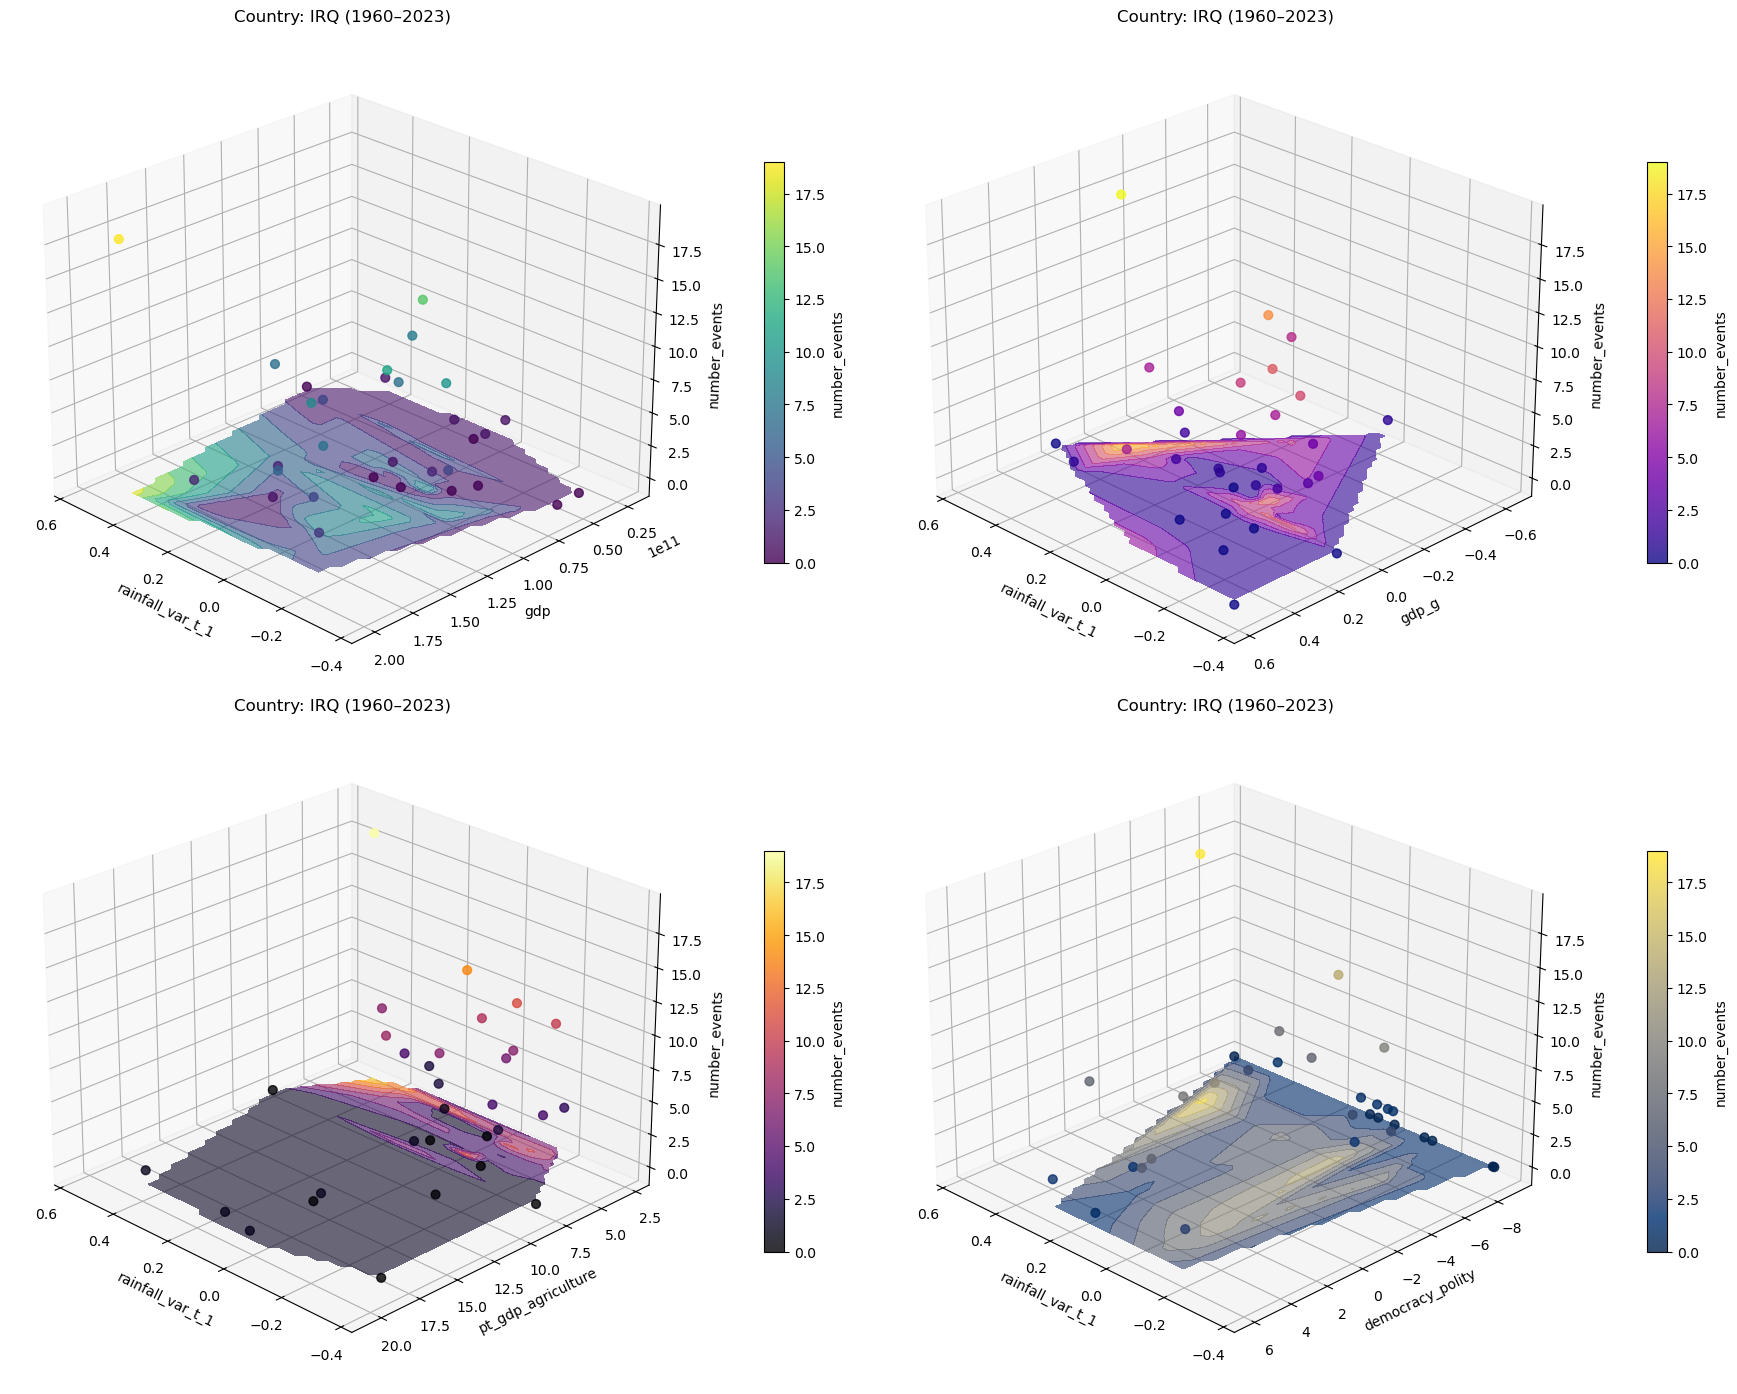

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# Define variables for each plot
plots = [
    {'x': 'rainfall_var_t_1', 'y': 'gdp', 'z': 'number_events', 'cmap': 'viridis'},
    {'x': 'rainfall_var_t_1', 'y': 'gdp_g', 'z': 'number_events', 'cmap': 'plasma'},
    {'x': 'rainfall_var_t_1', 'y': 'pt_gdp_agriculture', 'z': 'number_events', 'cmap': 'inferno'},
    {'x': 'rainfall_var_t_1', 'y': 'democracy_polity', 'z': 'number_events', 'cmap': 'cividis'}
]

fig = plt.figure(figsize=(18, 14))

for i, plot in enumerate(plots, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    
    # Extract data
    x = df_plot[plot['x']]
    y = df_plot[plot['y']]
    z = df_plot[plot['z']]
    c = z
    
    # Scatter
    sc = ax.scatter(x, y, z, c=c, cmap=plot['cmap'], s=40, alpha=0.8)
    
    # Colorbar
    cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
    cbar.set_label(f"{plot['z']}")
    
    # Grid and interpolation
    xi = np.linspace(x.min(), x.max(), 50)
    yi = np.linspace(y.min(), y.max(), 50)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='linear')
    
    # Contour projection
    ax.contourf(xi, yi, zi, zdir='z', offset=z.min(), cmap=plot['cmap'], alpha=0.6)
    
    # Labels and title
    ax.set_xlabel(f"{plot['x']}")
    ax.set_ylabel(f"{plot['y']}")
    ax.set_zlabel(f"{plot['z']}")
    ax.set_title(f'Country: {iso} ({year_begin}–{year_end})')
    
    # View angle
    ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show()


## Using XGBoost for regression

In [73]:
## import xgboost
import xgboost
from sklearn.model_selection import train_test_split

In [74]:
feats = ['rainfall_var_t_1', 'pt_gdp_agriculture', 'democracy_polity', 'gdp', 'gdp_g']
#target = 'participants'
target = 'number_events'

train_data, test_data = train_test_split(df_plot, test_size=0.3)

In [75]:
## Let's recreate our learning_rate comparison

### Create an XGBRegressor object
### learning_rate=.1, max_depth=1, n_estimators=10
xgb_reg1 = xgboost.XGBRegressor(learning_rate=.1,
                                   max_depth=1,
                                   #early_stopping_rounds = 10,
                                   n_estimators=500)

## fit the model, including an eval_set
xgb_reg1.fit(train_data[feats], train_data[target], eval_set=[(test_data[feats], test_data[target])])

### Create an XGBRegressor object
### learning_rate=1, max_depth=1, n_estimators=10
xgb_reg2 = xgboost.XGBRegressor(learning_rate=.2,
                                   max_depth=1,
                                   #early_stopping_rounds = 10,
                                   n_estimators=500)

 ## fit the model, including an eval_set
xgb_reg2.fit(train_data[feats], train_data[target], eval_set=[(test_data[feats], test_data[target])])


[0]	validation_0-rmse:4.57404
[1]	validation_0-rmse:4.41676
[2]	validation_0-rmse:4.42129
[3]	validation_0-rmse:4.48615
[4]	validation_0-rmse:4.36211
[5]	validation_0-rmse:4.43025
[6]	validation_0-rmse:4.44519
[7]	validation_0-rmse:4.51406
[8]	validation_0-rmse:4.41567
[9]	validation_0-rmse:4.48553
[10]	validation_0-rmse:4.55774
[11]	validation_0-rmse:4.47265
[12]	validation_0-rmse:4.54434
[13]	validation_0-rmse:4.61668
[14]	validation_0-rmse:4.54331
[15]	validation_0-rmse:4.61411
[16]	validation_0-rmse:4.63047
[17]	validation_0-rmse:4.71908
[18]	validation_0-rmse:4.78534
[19]	validation_0-rmse:4.80410
[20]	validation_0-rmse:4.86675
[21]	validation_0-rmse:4.81579
[22]	validation_0-rmse:4.89607
[23]	validation_0-rmse:4.95508
[24]	validation_0-rmse:5.01264
[25]	validation_0-rmse:4.97071
[26]	validation_0-rmse:5.02571
[27]	validation_0-rmse:5.04294
[28]	validation_0-rmse:5.11242
[29]	validation_0-rmse:5.12148
[30]	validation_0-rmse:5.17162
[31]	validation_0-rmse:5.18865
[32]	validation_0-

[45]	validation_0-rmse:5.39648
[46]	validation_0-rmse:5.38436
[47]	validation_0-rmse:5.39976
[48]	validation_0-rmse:5.38822
[49]	validation_0-rmse:5.36919
[50]	validation_0-rmse:5.37977
[51]	validation_0-rmse:5.36880
[52]	validation_0-rmse:5.38428
[53]	validation_0-rmse:5.37378
[54]	validation_0-rmse:5.38902
[55]	validation_0-rmse:5.37897
[56]	validation_0-rmse:5.39396
[57]	validation_0-rmse:5.40374
[58]	validation_0-rmse:5.38821
[59]	validation_0-rmse:5.37803
[60]	validation_0-rmse:5.39241
[61]	validation_0-rmse:5.38272
[62]	validation_0-rmse:5.36849
[63]	validation_0-rmse:5.35938
[64]	validation_0-rmse:5.37372
[65]	validation_0-rmse:5.36501
[66]	validation_0-rmse:5.37905
[67]	validation_0-rmse:5.38793
[68]	validation_0-rmse:5.37953
[69]	validation_0-rmse:5.39327
[70]	validation_0-rmse:5.38524
[71]	validation_0-rmse:5.37288
[72]	validation_0-rmse:5.38261
[73]	validation_0-rmse:5.39098
[74]	validation_0-rmse:5.40391
[75]	validation_0-rmse:5.39611
[76]	validation_0-rmse:5.38532
[77]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [76]:
# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("XGBoost 1) Train MSE:", mean_squared_error(train_data[target], xgb_reg1.predict(train_data[feats]), squared=False))
print("XGBoost 1) Train R²:", r2_score(train_data[target], xgb_reg1.predict(train_data[feats])))
print("XGBoost 1) Test MSE:", mean_squared_error(test_data[target], xgb_reg1.predict(test_data[feats]), squared=False))
print("XGBoost 1) Test R²:", r2_score(test_data[target], xgb_reg1.predict(test_data[feats])))
print('')

print("XGBoost 2) Train MSE:", mean_squared_error(train_data[target], xgb_reg2.predict(train_data[feats]), squared=False))
print("XGBoost 2) Train R²:", r2_score(train_data[target], xgb_reg2.predict(train_data[feats])))
print("XGBoost 2) Test MSE:", mean_squared_error(test_data[target], xgb_reg2.predict(test_data[feats]), squared=False))
print("XGBoost 2) Test R²:", r2_score(test_data[target], xgb_reg2.predict(test_data[feats])))
print('')

# Prediction
predicted_1 = xgb_reg1.predict(test_data[feats])
predicted_2 = xgb_reg2.predict(test_data[feats])
print(f"XGBoost 1) Predicted # events: {predicted_1[0]}")
print(f"XGBoost 2) Predicted # events: {predicted_2[0]}")

XGBoost 1) Train MSE: 0.31829035092722574
XGBoost 1) Train R²: 0.9952822431209526
XGBoost 1) Test MSE: 5.936310575037598
XGBoost 1) Test R²: -0.562047129579043

XGBoost 2) Train MSE: 0.09774119872739637
XGBoost 2) Train R²: 0.9995551189239131
XGBoost 2) Test MSE: 6.045366876866958
XGBoost 2) Test R²: -0.6199672285425601

XGBoost 1) Predicted # events: 5.383265018463135
XGBoost 2) Predicted # events: 5.667734622955322


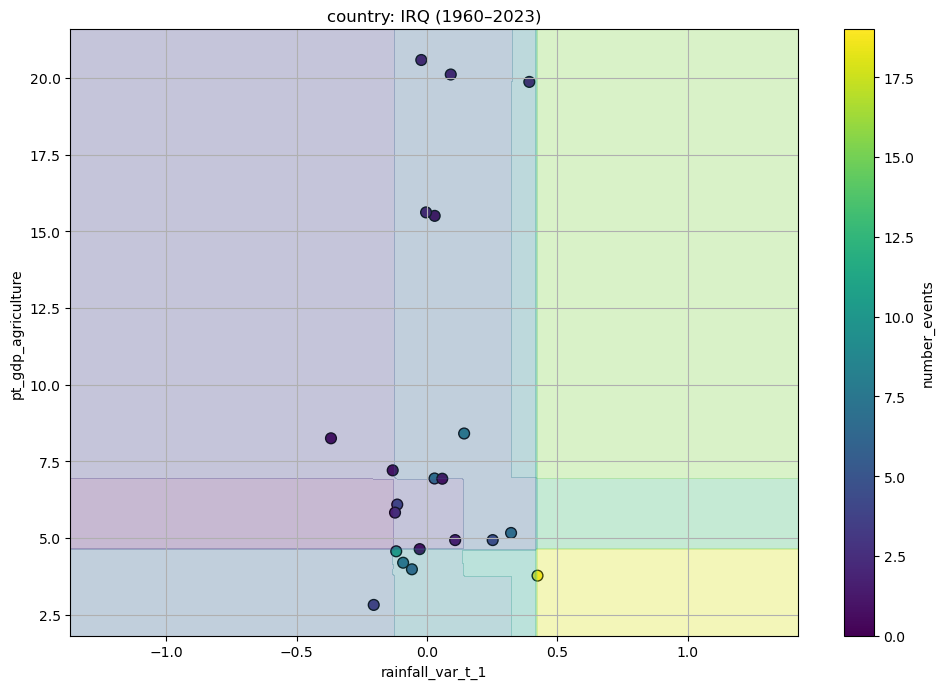

In [77]:
# Choose two features for the meshgrid
x1 = 'rainfall_var_t_1'
x2 = 'pt_gdp_agriculture'

# Values for other features — use means from training data
fixed_vals = train_data[feats].drop([x1, x2], axis=1).mean()

# Create meshgrid for x1 and x2
x_min, x_max = train_data[x1].min() - 1, train_data[x1].max() + 1
y_min, y_max = train_data[x2].min() - 1, train_data[x2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Prepare the grid points for prediction
grid_points = pd.DataFrame({
    x1: xx.ravel(),
    x2: yy.ravel()
})

# Add the fixed values for the other features
for col in feats:
    if col not in [x1, x2]:
        grid_points[col] = fixed_vals[col]

# Predict over the grid
Z = xgb_reg2.predict(grid_points)

# Reshape to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 7))

# Scatter actual data points
scatter = plt.scatter(train_data[x1], train_data[x2], c=train_data[target], cmap='viridis', edgecolor='k', s=60)

# Contourf for predicted surface
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Labels and colorbar
plt.xlabel(x1)
plt.ylabel(x2)
plt.title(f'country: {iso} ({year_begin}–{year_end})')

cbar = plt.colorbar(scatter)
cbar.set_label(target)

plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
## demonstrate .evals_result()
#xgb_reg1.evals_result()

In [79]:
#xgb_reg2.evals_result()

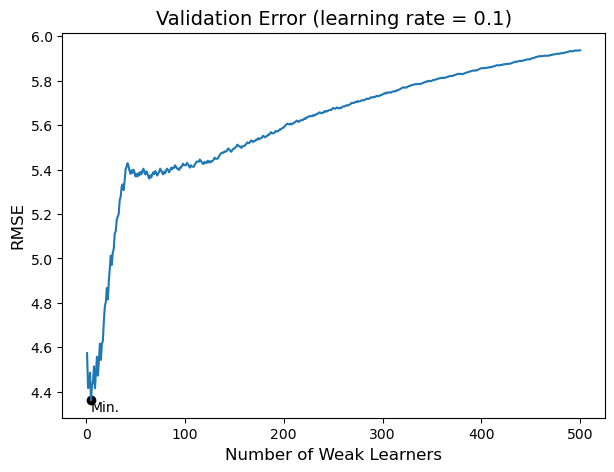

In [80]:
plt.figure(figsize=(7,5))

plt.plot(range(1,len(xgb_reg1.evals_result()['validation_0']['rmse'])+1), 
         xgb_reg1.evals_result()['validation_0']['rmse'])
plt.scatter([range(1,len(xgb_reg1.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg1.evals_result()['validation_0']['rmse'])]], 
            [np.min(xgb_reg1.evals_result()['validation_0']['rmse'])], c='k')
plt.text(range(1,len(xgb_reg1.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg1.evals_result()['validation_0']['rmse'])], 
         np.min(xgb_reg1.evals_result()['validation_0']['rmse'])-.05, "Min.", fontsize=10)

plt.title("Validation Error (learning rate = 0.1)", fontsize=14)
plt.xlabel("Number of Weak Learners", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.show()

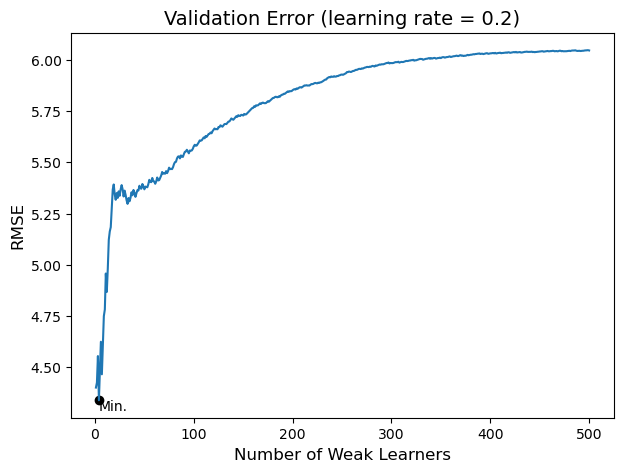

In [81]:
plt.figure(figsize=(7,5))

plt.plot(range(1,len(xgb_reg2.evals_result()['validation_0']['rmse'])+1), 
         xgb_reg2.evals_result()['validation_0']['rmse'])
plt.scatter([range(1,len(xgb_reg2.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg2.evals_result()['validation_0']['rmse'])]], 
            [np.min(xgb_reg2.evals_result()['validation_0']['rmse'])], c='k')
plt.text(range(1,len(xgb_reg2.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg2.evals_result()['validation_0']['rmse'])], 
         np.min(xgb_reg2.evals_result()['validation_0']['rmse'])-.05, "Min.", fontsize=10)

plt.title("Validation Error (learning rate = 0.2)", fontsize=14)
plt.xlabel("Number of Weak Learners", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.show()

## Cross-validation to choose between XGB(learning_rate=.1) and XGB(learning_rate=.2)

### Validation set

In [82]:
## Here we make a validation set with 15% of the 
## training data in the validation set
X_train_train, X_val, y_train_train, y_val = train_test_split(train_data[feats], train_data[target],
                                                                 shuffle = True,
                                                                 random_state = 321,
                                                                 test_size=.15)

In [83]:
## import KFold
from sklearn.model_selection import KFold

In [84]:
## make a KFold object
## n_splits controls the value of k
## shuffle=True, randomly shuffles the data prior to splitting
## random_state is the same as for train_test_split
kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 582)

In [85]:
## demonstrate.split
#kfold.split(train_data[feats], train_data[target])

In [86]:
from sklearn.metrics import mean_squared_error

# rmses will hold the cross validation root mean squared errors of each model. 
rmses = np.zeros((2, 5))

for i, (train_index, test_index) in enumerate(kfold.split(train_data[feats], train_data[target])):
    ## get the kfold training data
    X_train_train = train_data[feats].iloc[train_index,:]
    y_train_train = train_data[target].iloc[train_index]
    
    ## get the holdout data
    X_holdout = train_data[feats].iloc[test_index,:]
    y_holdout = train_data[target].iloc[test_index]

    ## Fit both models
    xgb_reg1.fit(X_train_train,y_train_train)
    xgb_reg2.fit(X_train_train,y_train_train)

    ## Use both models to generate predictions on the holdout set
    xgb_reg1_preds = xgb_reg1.predict(X_holdout)
    xgb_reg2_preds = xgb_reg2.predict(X_holdout)


    ## Record the rmses
    rmses[0,i] = np.sqrt(mean_squared_error(y_holdout, xgb_reg1_preds))
    rmses[1,i] = np.sqrt(mean_squared_error(y_holdout, xgb_reg2_preds)) 

In [87]:
rmses.mean(axis = 1)

array([3.23503512, 3.1481561 ])

We can see that the XGBoost(learning_rate = .1) regression model does generalize a bit better then XGBoost(learning_rate = .2).